In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold


## Preparing Data For Training

In [2]:
# import airfil_self_noise.csv
df = pd.read_csv('/content/airfoil_self_noise.csv')
df.head()
df = df.sample(frac=1)
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
274,630,2.0,0.2286,39.6,0.003466,127.417
284,6300,2.0,0.2286,39.6,0.003466,116.417
414,1250,7.3,0.2286,55.5,0.011171,125.724
690,4000,9.9,0.1524,31.7,0.025278,111.459
95,10000,1.5,0.3048,39.6,0.003921,108.991
...,...,...,...,...,...,...
696,400,12.6,0.1524,71.3,0.048316,127.094
498,500,0.0,0.1524,31.7,0.002094,121.617
605,2500,7.2,0.1524,71.3,0.007520,124.353
1033,1000,4.8,0.0254,39.6,0.000907,122.956


In [3]:
X_train ,y_train= df.iloc[:,:-1],df.iloc[:,-1:]

## Linear Regression Algorithm

In [4]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)

lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)
scores = cross_validate(model, X_train, y_train, cv=crossvalidation,
 n_jobs=1)

lr_time = scores['fit_time'].mean()
print(lr_time)
lr_score = scores['test_score'].mean()
print(lr_score)

0.0030609607696533204
0.5002492807920527


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## k-Nearest-Neighbors (k-NN) Algorithm

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier

knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the classifier to the data

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

model = knn.fit(X_train,y_train_encoded)
scores = cross_validate(model, X_train, y_train_encoded, cv=crossvalidation)

kn_time = scores['fit_time'].mean()
print(kn_time)
kn_score = scores['test_score'].mean()
print(kn_score)

0.002562260627746582
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### K-NN Algorithm Tuning

In [6]:
from sklearn.neighbors import KNeighborsClassifier


knData = {}
knTime = {}

neighbours = [1, 2, 3, 4, 5]
for n in neighbours:
  knn = KNeighborsClassifier(n_neighbors = n)
  # Fit the classifier to the data

  from sklearn import preprocessing
  lab_enc = preprocessing.LabelEncoder()
  y_train_encoded = lab_enc.fit_transform(y_train)

  model = knn.fit(X_train,y_train_encoded)
  scores = cross_validate(model, X_train, y_train_encoded, cv=crossvalidation,
  n_jobs=1)
  knData[n] = scores['test_score'].mean()
  knTime[n] = scores['fit_time'].mean()

print(knData)
print(knTime)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
{1: 0.002946305274963379, 2: 0.002634477615356445, 3: 0.002588319778442383, 4: 0.0026830196380615234, 5: 0.0026801347732543944}


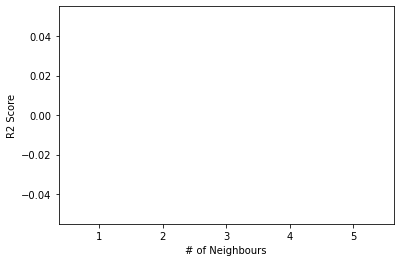

In [7]:
plt.bar(range(len(knData)), list(knData.values()), align='center')
plt.xticks(range(len(knData)), list(knData.keys()))
plt.xlabel("# of Neighbours")
plt.ylabel("R2 Score")
plt.show()

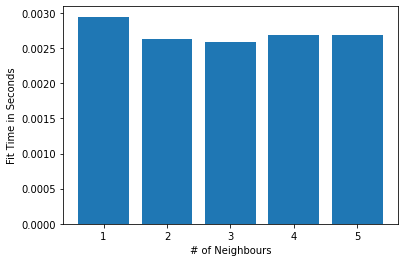

In [8]:
plt.bar(range(len(knTime)), list(knTime.values()), align='center')
plt.xticks(range(len(knTime)), list(knTime.keys()))
plt.xlabel("# of Neighbours")
plt.ylabel("Fit Time in Seconds")
plt.show()

## Decision Trees Algorithm

In [9]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)

from sklearn import tree, ensemble
scores = cross_validate(tree.DecisionTreeRegressor(random_state= 42), X_train, y_train, cv=crossvalidation)

dt_time = scores['fit_time'].mean()
print(dt_time)
dt_score = scores['test_score'].mean()
print(dt_score)

0.006290316581726074
0.8590372779935885


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Decision Tree Regressor Tuning


In [10]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)
dtData = {}
dtTime = {}
for val in max_depth:
    scores = cross_validate(tree.DecisionTreeRegressor(max_depth= val, random_state= 42),  X_train, y_train, cv=crossvalidation)
    dtData[val] = scores['test_score'].mean()
    dtTime[val] = scores['fit_time'].mean()

print(dtData)
print(dtTime)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{1: 0.13945454256642034, 2: 0.33839433401534513, 3: 0.4233960184539655, 4: 0.5182249274585005, 5: 0.6009271974262564, 6: 0.6897014019303394, 7: 0.7338640259727904, 8: 0.7721201121537961, 9: 0.798090133124642, 10: 0.8203279689851002}
{1: 0.0035527229309082033, 2: 0.003662586212158203, 3: 0.0032879114151000977, 4: 0.0036466121673583984, 5: 0.0037429094314575194, 6: 0.004810142517089844, 7: 0.004538846015930176, 8: 0.004525303840637207, 9: 0.005013155937194824, 10: 0.005008769035339355}


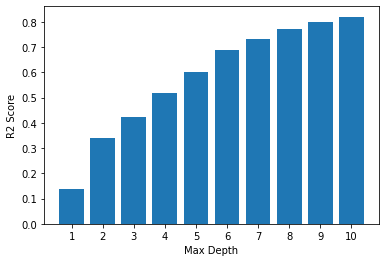

In [11]:
plt.bar(range(len(dtData)), list(dtData.values()), align='center')
plt.xticks(range(len(dtData)), list(dtData.keys()))
plt.xlabel("Max Depth")
plt.ylabel("R2 Score")
plt.show()

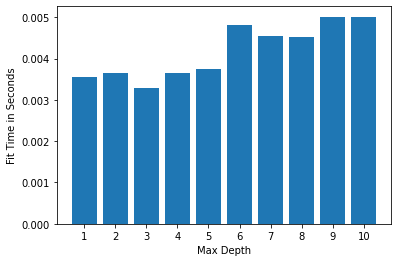

In [12]:
plt.bar(range(len(dtTime)), list(dtTime.values()), align='center')
plt.xticks(range(len(dtTime)), list(dtTime.keys()))
plt.xlabel("Max Depth")
plt.ylabel("Fit Time in Seconds")
plt.show()

## Random Forest Algorithm

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [14]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
model = regressor.fit(X_train, y_train.values.ravel())

crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)
scores = cross_validate(model, X_train, y_train.values.ravel(), cv=crossvalidation)

rf_time = scores['fit_time'].mean()
print(rf_time)
rf_score = scores['test_score'].mean()
print(rf_score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.03890759944915771
0.9245514716258121


### Random Forest Regressor Tuning


In [15]:
estimators = [5, 10, 20, 50, 100, 200]
rfData = {}
rfTime = {}
for count in estimators:
    scores = cross_validate(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X_train, y_train.values.ravel(), cv=crossvalidation)
    print(f'For estimators: {count}')
    print(scores['test_score'].mean())
    rfData[count] = scores['test_score'].mean()
    rfTime[count] = scores['fit_time'].mean()
print(rfData)
print(rfTime)

For estimators: 5
0.9150522788915
For estimators: 10
0.9313382803998062
For estimators: 20
0.935610176598157
For estimators: 50
0.9390862403137124
For estimators: 100
0.939861627196479
For estimators: 200
0.9402293486566059
{5: 0.9150522788915, 10: 0.9313382803998062, 20: 0.935610176598157, 50: 0.9390862403137124, 100: 0.939861627196479, 200: 0.9402293486566059}
{5: 0.020241093635559083, 10: 0.04198620319366455, 20: 0.07828896045684815, 50: 0.1860196113586426, 100: 0.370458722114563, 200: 0.7343355417251587}


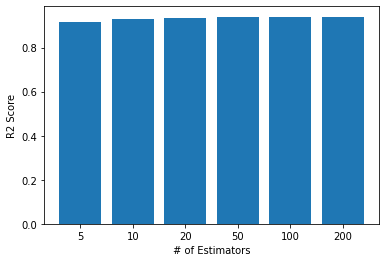

In [16]:
plt.bar(range(len(rfData)), list(rfData.values()), align='center')
plt.xticks(range(len(rfData)), list(rfData.keys()))
plt.xlabel("# of Estimators")
plt.ylabel("R2 Score")
plt.show()

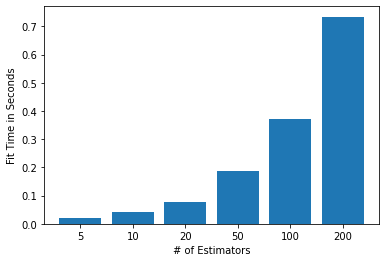

In [17]:
plt.bar(range(len(rfTime)), list(rfTime.values()), align='center')
plt.xticks(range(len(rfTime)), list(rfTime.keys()))
plt.xlabel("# of Estimators")
plt.ylabel("Fit Time in Seconds")
plt.show()

In [18]:
allScores = {
  "Linear\nRegression": lr_score,
  "K-NN\nRegression": kn_score,
  "Decision\nTrees": dt_score,
  "Random\nForest": rf_score
}

allTimes = {
  "Linear\nRegression": lr_time,
  "K-NN\nRegression": kn_time,
  "Decision\nTrees": dt_time,
  "Random\nForest": rf_time
}

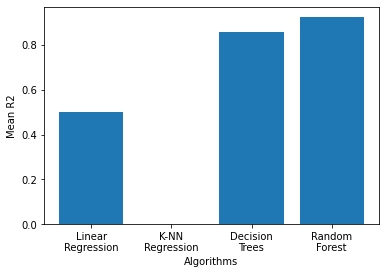

In [19]:
plt.bar(range(len(allScores)), list(allScores.values()), align='center')
plt.xticks(range(len(allScores)), list(allScores.keys()))
plt.xlabel("Algorithms")
plt.ylabel("Mean R2")
plt.show()

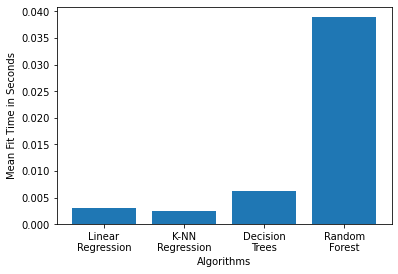

In [20]:
plt.bar(range(len(allTimes)), list(allTimes.values()), align='center')
plt.xticks(range(len(allTimes)), list(allTimes.keys()))
plt.xlabel("Algorithms")
plt.ylabel("Mean Fit Time in Seconds")
plt.show()